In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

**make this plots interactive**

Text(0, 0.5, 'p(food = 1)')

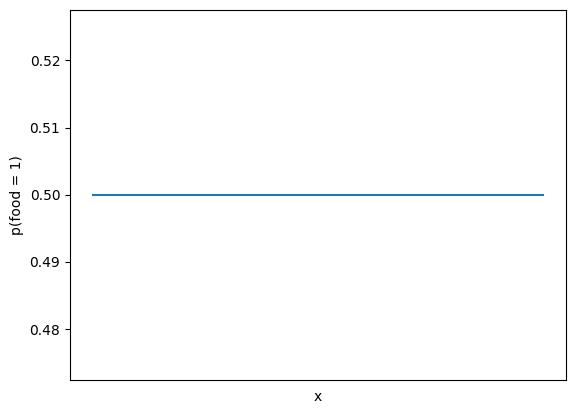

In [2]:
def logistic(x, b0=0, b1=1):
    return 1 / (1 + np.exp(-(b0 + b1*x)))

x = np.linspace(-10, 10, 100)
y = logistic(x, b0=0, b1=0)

plt.plot(x, y)
plt.xticks([])
plt.xlabel('x')
plt.ylabel('p(food = 1)')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.06417927017062716
            Iterations: 42
            Function evaluations: 46
            Gradient evaluations: 42


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  158
Model:                          Logit   Df Residuals:                      156
Method:                           MLE   Df Model:                            1
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.9700
Time:                        16:38:42   Log-Likelihood:                -3.2849
converged:                       True   LL-Null:                       -109.40
Covariance Type:            nonrobust   LLR p-value:                 4.466e-48
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.4978      3.100     -4.032      0.000     -18.574      -6.422
x1                  0        nan        nan        nan         nan         nan
x2                  0        nan        nan        nan         nan         nan
x3             1.2130      0.304      3.984      0.000       0.616       1.810
==============================================================================

Possibly complete quasi-separation: A fraction 0.41 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

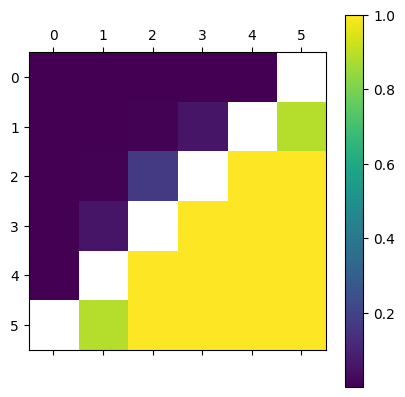

In [41]:
np.random.seed(2)
n = 200
X1 = np.random.randint(1, 7, n)
X2 = np.random.randint(1, 7, n)
valid = (X1 + X2) != 7
X1 = X1[valid]
X2 = X2[valid]
Y = []

for i, (x1, x2) in enumerate(zip(X1, X2)):
    y = 0
    # if ((x1 < 4) and (x2 < 4)) or ((x1 >= 4) and (x2 >= 4)): # 2d2 rule
    # if x2 < 4: # 2d1 rule
    if (x1 + x2) > 7:
        y = 1
    Y.append(y)
Y = np.array(Y)

exog = sm.add_constant(np.stack([X1, X2, X1*X2], axis=1))
endog = Y.reshape([-1, 1]).astype(float)

model = sm.Logit(endog, exog)
fitted = model.fit_regularized(method='l1', alpha=.5)

display(fitted.summary())

y = np.zeros([6, 6])
for i, x1 in enumerate(range(1, 7)):
    for j, x2 in enumerate(range(1, 7)):
        x = np.array([1, x1, x2, x1*x2])
        logit = np.sum(fitted.params * x)
        y[i, j] = 1 / (1 + np.exp(-logit))
        if x1 + x2 == 7:
            y[i, j] = np.nan

plt.matshow(y)
plt.colorbar()